# Práctica Final: Clasificación de Documentos con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación de documentos. El objetivo es construir un modelo capaz de clasificar automáticamente documentos en categorías predefinidas.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packag

Instalamos las librerias necesarias y cargamos el conjunto de datos de cáncer de mama proporcionado por Scikit-Learn. Posteriormente, lo guardamos en un dataframe y hacemos una visualización de los primeros registros.

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import subprocess

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Estos datos constan de 569 observaciones y 31 variables. Éstas constan de la media, desviación estándar y peor medida de la textura, perímetro, simetría, concavidad..

In [ ]:
df.shape

(569, 31)

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Ahora, vamos a separar nuestros datos en train y test para entrenar los modelos.

In [ ]:
train, test = train_test_split(df, test_size=0.2)

test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

Vamos a probar con un modelo de **Random Forest** variando el número de estimadores.

In [ ]:
!pip install pyngrok

In [ ]:
n_stimators = [2,10,20,30,50,80,100,130, 150, 200, 500]

mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

mlflow.set_experiment('Pruebas Random Forest')

for i in n_stimators:
  with mlflow.start_run() as run:
    clf = RandomForestClassifier(n_estimators=i,
                                min_samples_leaf=2,
                                class_weight='balanced',
                                random_state=123)

    preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

    model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('RandomForestClassifier', clf)])
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)

    mlflow.log_metric('accuracy_train', accuracy_train)
    mlflow.log_metric('accuracy_test', accuracy_test)
    mlflow.log_param('n_stimators', i)
    mlflow.sklearn.log_model(model, 'clf-model')

2024/04/04 09:38:09 INFO mlflow.tracking.fluent: Experiment with name 'Pruebas Random Forest' does not exist. Creating a new experiment.


In [ ]:
from pyngrok import ngrok

get_ipython().system_raw('mlflow ui --port 5000 &')

ngrok.kill()

NGROK_AUTH_TOKEN = '2eUstZyddZ4MiKuFDTOoWJxN5B5_5gGCJAjKEReCPAgstjtc3'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls =True)
print('El tracking UI: ', ngrok_tunnel.public_url)

El tracking UI:  https://351f-34-106-135-7.ngrok-free.app


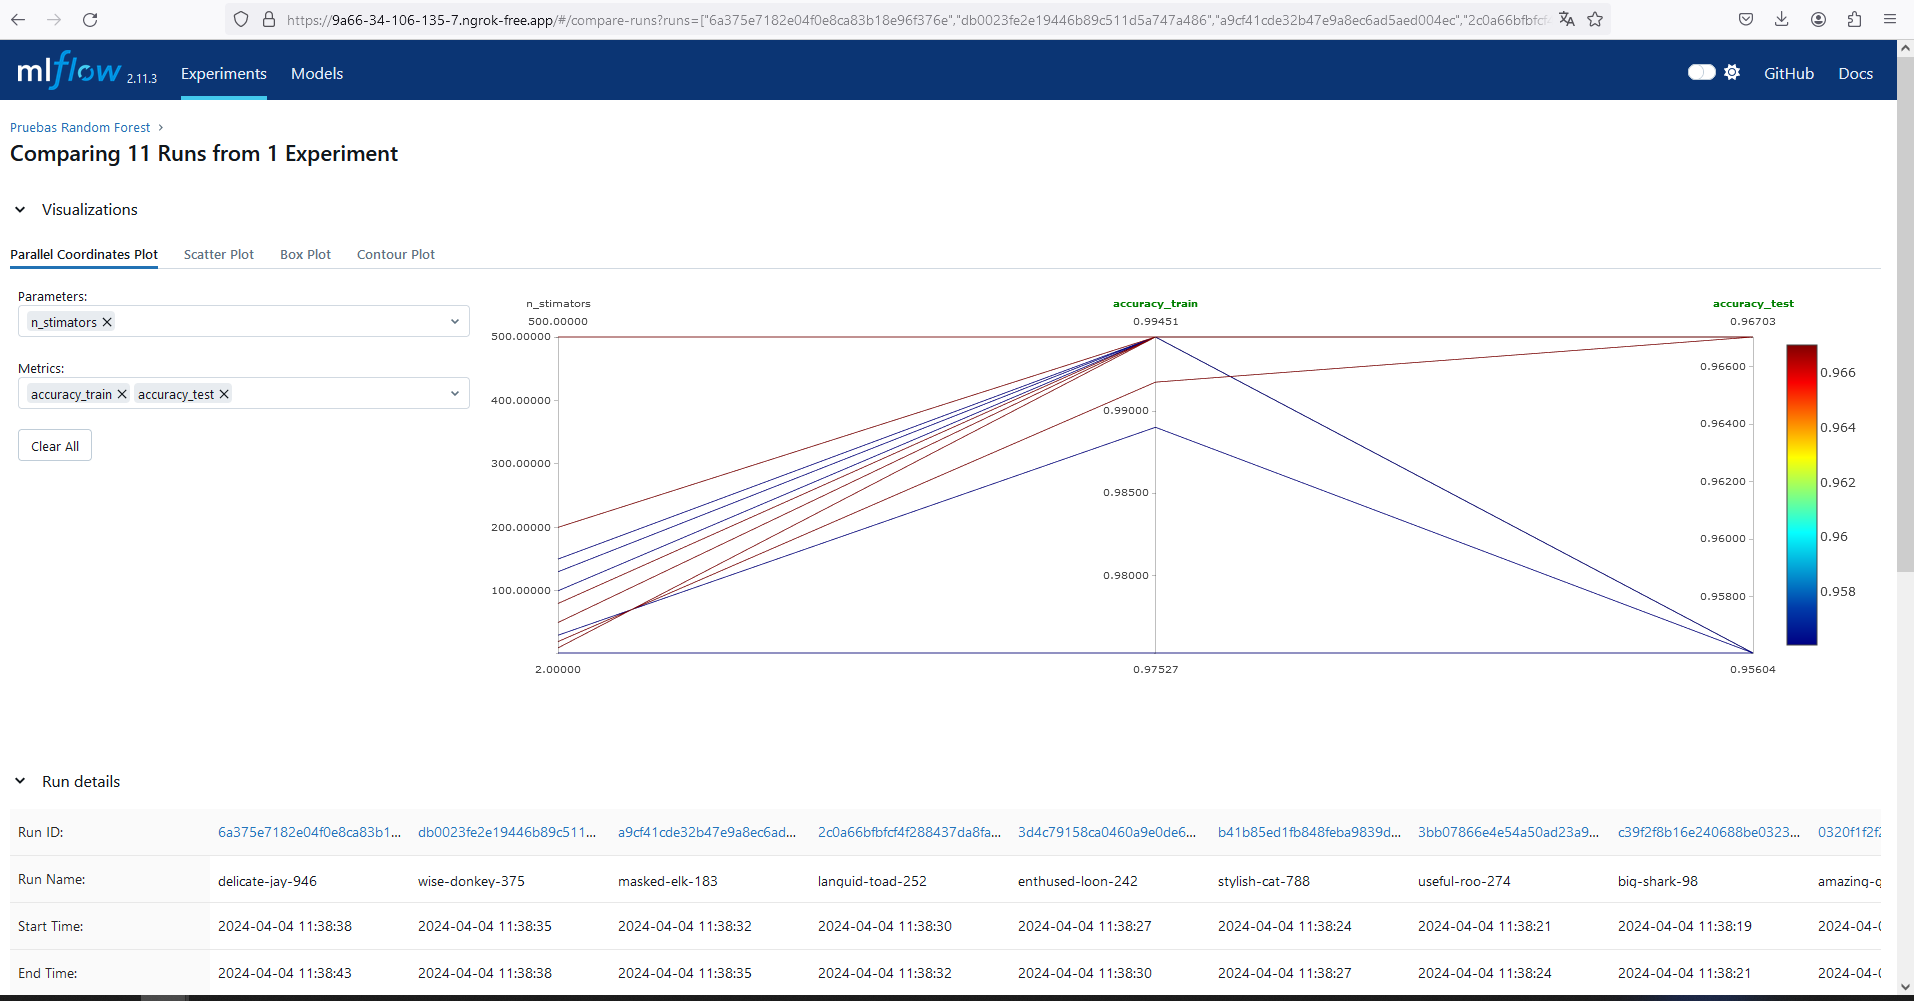

En la imagen anterior, podemos observar como varía la accuracy en train y test en función del número de estimadores. Todos tienen una accuracy superior a 0.98 en train y 0.95 en test. Un dato peculiar es que utilizando 50, 80 o 200 estimadores las métricas son iguales.

Ahora vamos a probar con un modelo de **Gradient Boosting** variando el número de estimadores y el learning rate.

In [ ]:
n_stimators = [20,50,100,200]
learning_rate = [0.01, 0.05, 0.1]

mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

mlflow.set_experiment('Pruebas Gradient Boosting')

for i in n_stimators:
  for j in learning_rate:
    with mlflow.start_run() as run:
      gb = GradientBoostingClassifier(n_estimators=i, learning_rate=j, random_state=42)

      preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

      model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('GradientBoostingClassifier', gb)])
      model.fit(x_train, y_train)
      accuracy_train = model.score(x_train, y_train)
      accuracy_test = model.score(x_test, y_test)

      mlflow.log_metric('accuracy_train', accuracy_train)
      mlflow.log_metric('accuracy_test', accuracy_test)
      mlflow.log_param('n_stimators', i)
      mlflow.log_param('learning_rate', j)
      mlflow.sklearn.log_model(model, 'gb')

2024/04/04 09:43:33 INFO mlflow.tracking.fluent: Experiment with name 'Pruebas Gradient Boosting' does not exist. Creating a new experiment.


In [ ]:
from pyngrok import ngrok

get_ipython().system_raw('mlflow ui --port 5000 &')

ngrok.kill()

NGROK_AUTH_TOKEN = '2eUstZyddZ4MiKuFDTOoWJxN5B5_5gGCJAjKEReCPAgstjtc3'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls =True)
print('El tracking UI: ', ngrok_tunnel.public_url)

El tracking UI:  https://9a66-34-106-135-7.ngrok-free.app


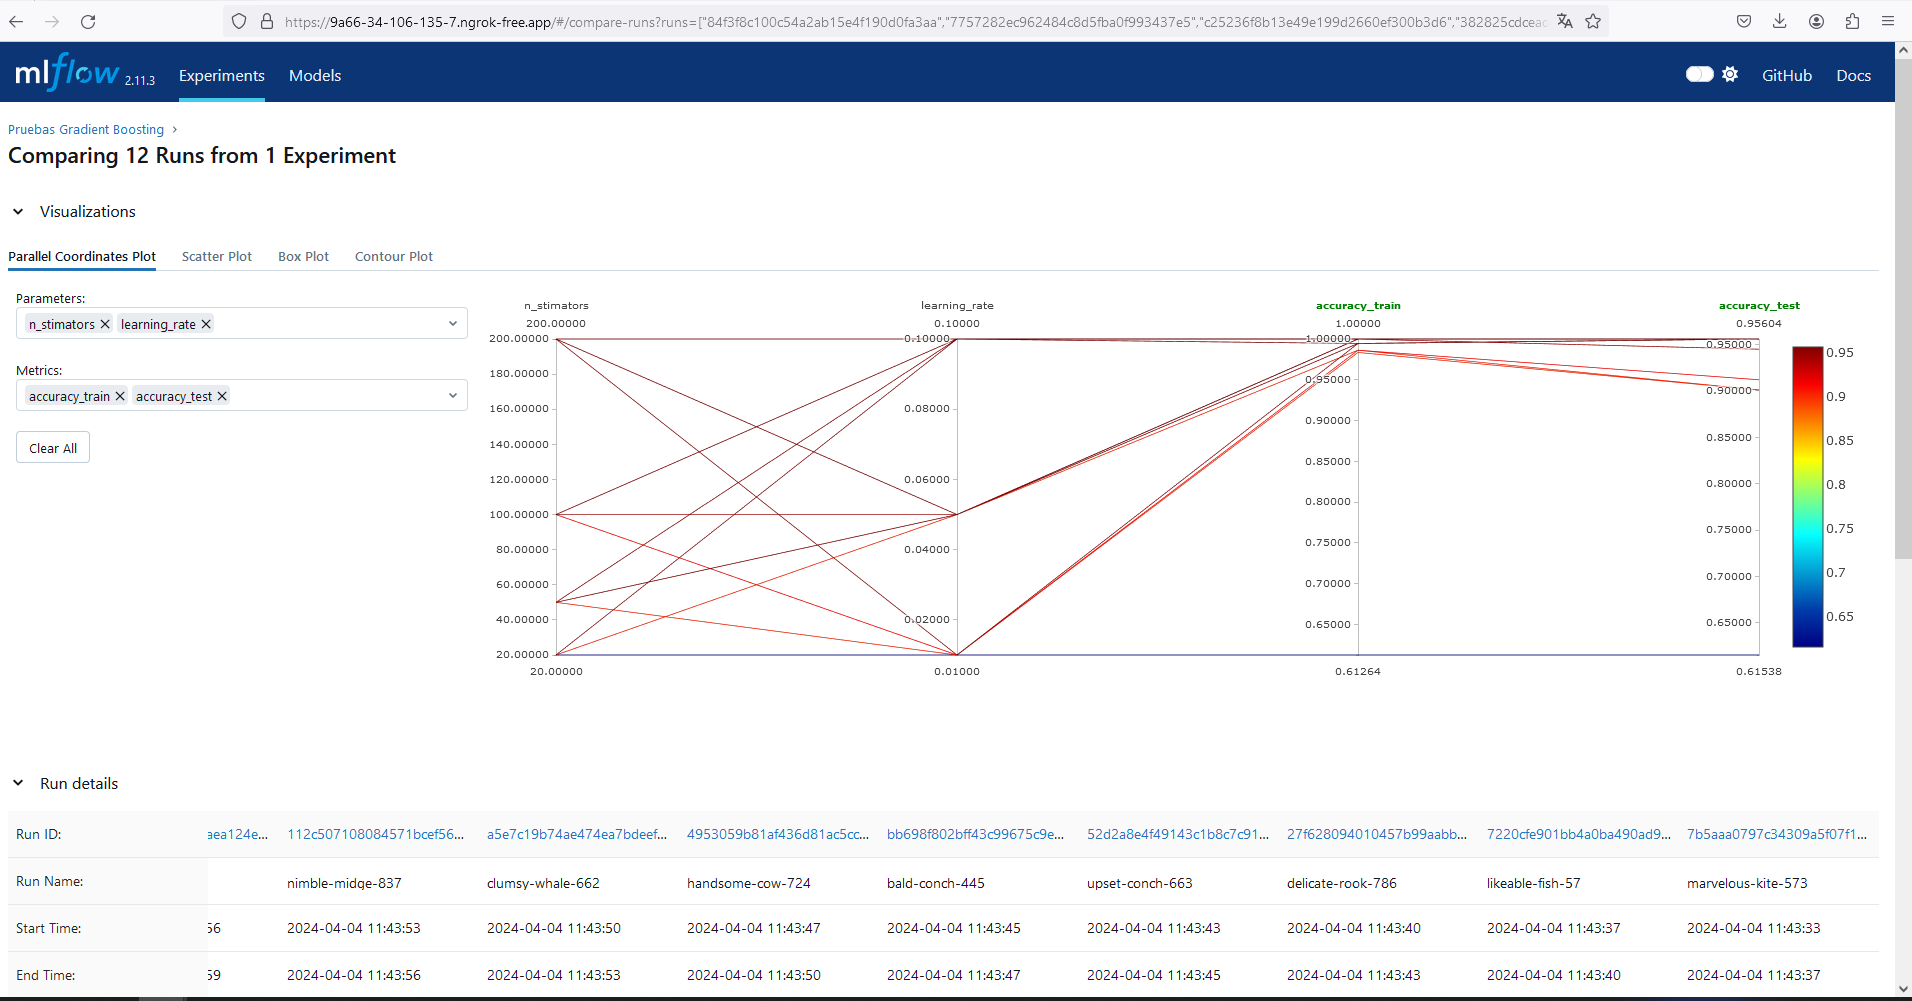

Aquí podemos observar que con 20 estimadores y 0.01 de learning rate obtenemos un modelo con una accuracy de 0.6 en train y test, por tanto, este modelo lo descartaríamos. Al igual que en el modelo anterior, obtenemos las mismas métricas para modelos con parámetros 0.1 y 20, 0.05 y 50, 0.01 y 200 learning rate y estimadores, respectivamente.

# Práctica Final: detección de mensajes troll



En los últimos años Twitch se ha consolidad como uno de los principales medios de comunicación especialmente para las generaciones más jóvenes.

Al tratarse de una plataforma participativa en la que los usuarios pueden poner comentarios durante y posteriormente a las emisiones. Entre estos comentarios han aparecido como siempre comentarios ofensisvos.

En esta práctica construiremos una Inteligencia Artificial capaz de clasificar esos mensajes troll.

Durante la práctica entrenaremos el modelo de Deep Learning y lo desplegaremos para inferencia en batch, la más habitual actualmente dentro de la industria:

## Teoría

**1. ¿Qué es Apache Beam?**

Apache Beam es un framework de trabajo que permite definir pipelines de procesado de datos enfocadas a la paralelización de procesos.

Beam es una abstracción por lo que los detalles de implementación son gestionados por los motores de ejecución (Flink, DataFlow...)

Es un framework compatible con distintos lenguajes de programación como Java, Python o Go.

**2. ¿Cuáles son las diferentes formas de desplegar un modelo?**

Distinguimos cuatro opciones:

* Despligue en Batch. Desplegamos el modelo para hacer predicciones de grandes cantidades de datos en un momento puntual.

* Despligue online. Permite la disponibilización del modelo a demanda por el ususario de manera que se pueden realizar predicciones mediante llamdas a APIs.

* Despliegue en streaming Despligue pensando en la recepción continua de datos de manera que nuestro servidor es capaz de procesar un flujo continuo e ininterrumpido de datos en tiempo real.

* ML Automatizado. Es el estado más avanzado en el desarrollo de MLOPS en el que el modelo es monitoeado y reentrenado de manera automática.

**3. ¿Cuál es la principal diferencia entre la inferencia en batch y la inferencia en streaming?**

La inferencia en batch procesa grandes cantidades de datos en momentos puntuales y normalmente programados de antemano frente al procesamiento en streming cuya infrastructura está diseñada para estar constantemente en funcionamiento emitiendo predicciones de manera continua y en tiempo real (o casi).



# Configuración de nuestro proyecto en GCP


In [ ]:
PROJECT_ID = "inferencia-419407" #@param {type:"string"}
! gcloud config set project $PROJECT_ID

Updated property [core/project].


In [ ]:
import sys

# If you are running this notebook in Colab, run this cell and follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()

# If you are running this notebook locally, replace the string below with the
# path to your service account key and run this cell to authenticate your GCP
# account.
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

Creamos el bucket mediante la consola y una vez creado lo indicamos en la variable:

In [ ]:
BUCKET_NAME = "practica-implementacion" #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

In [ ]:
! gsutil mb -l $REGION gs://$BUCKET_NAME

Creating gs://practica-implementacion/...
You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.


# Entrenamiento e inferencia en Batch

## Preparación

Para esta primera parte se va a utilizar [Tweets Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/dataturks/dataset-for-detection-of-cybertrolls). El objetivo es desarrollar un clasificador binario para detectar si el mensaje recibido es troll (1) o no (0). **Las métricas obtenidas del entrenamiento y la inferencia no se tendrán en cuenta para la evaluación de la práctica, la importancia está en la arquitectura de la solución**, es decir, lo importante no es que nuestro modelo detecte correctamente los tweets de trolls si no que funcione y sea capaz de hacer inferencias.


A continuación, se van a subir los datos de entrenamiento al bucket del proyecto que se haya creado. **Importante:** crea el bucket en una única región. Os dejo disponibilizado el dataset en un bucket de acceso público:

In [ ]:
%pip install gdown
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"

Ahora se crea el directorio dónde vas a desarrollar esta primera parte de la práctica.

Se establece el directorio de trabajo que hemos creado.

Ahora se descargarán los datos en el workspace de Colab para trabajar en local.

Se establecen las dependencias que se usarán en la práctica. Se pueden añadir y quitar las dependencias que no se usen o viceversa.

In [ ]:
%%writefile requirements.txt

apache-beam[gcp]
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0

Instalamos las dependencias. **No olvides reiniciar el entorno al instalar y establecer las variables y credenciales de GCP al arrancar.**

In [ ]:
! pip install -r requirements.txt

In [ ]:
! pip install apache-beam[gcp]

## Primer ejercicio

Desarrollar un pipeline de preprocesamiento utilizando Apache Beam para generar datos de train, eval y test para los datos proporcionados anteriormente. Requisitos:

- Proporcionar dos modos de ejecución: `train` y `test`
- Soportar ejecuciones en local con `DirectRunner` y ejecuciones en Dataflow usando `DataFlowRunner`.

Se proporciona un fichero `setup.py` necesario para ejecutar en DataFlow. Modificar la variable `REQUIRED_PACKAGES` con las dependencias que se hayan usado en el `requirements.txt`

In [ ]:
%%writefile setup.py

import setuptools

REQUIRED_PACKAGES = [
  "apache-beam[gcp]==2.24.0",
  "tensorflow==2.8.0",
  "gensim==3.6.0",
  "fsspec==0.8.4",
  "gcsfs==0.7.1",
  "numpy==1.20.0"
]

setuptools.setup(
    name="twitchstreaming",
    version="0.0.1",
    install_requires=REQUIRED_PACKAGES,
    packages=setuptools.find_packages(),
    include_package_data=True,
    description="Troll detection",
)


Me creo una copia por si hubiera algún error en el procesamiento (buena práctica):

In [ ]:
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"
! gsutil cp dataset-cybertrolls.json //$WORK_DIR/data.json


### Validación preprocess train en local
Con el comando mostrado a continuación se valida la correcta generación de los datos de entrenamiento y validación en local.

### Validación preprocess test en local

Con el comando mostrado a continuación se valida la correcta generación de los datos de test en local.

## Segundo ejercicio

Desarrollar una tarea de entrenamiento para los datos preprocesados. Requisitos:

- Soportar ejecuciones en local usando el SDK de AI-Platform y ejecuciones en GCP con el mismo código.

Se crea el directorio donde trabajaremos:

In [ ]:
%mkdir /content/batch/trainer

In [ ]:
%%writefile trainer/__init__.py

version = "0.1.0"

### Validación Train en local

Con el comando mostrado a continuación se valida el correcto entrenamiento del modelo usando los datos preprocesados del apartado anterior.

## Tercer ejercicio

Desarrollar un pipeline de inferencia utilizando Apache Beam para generar predicciones usando los modelos generados en el apartado anterior así como los datos de test generados en el primer ejercicio.


Generamos un timestamp para la ejecución de las predicciones

### Validación Predict en local

Con el comando mostrado a continuación se valida la correcta inferencia usando los modelos anteriores y los datos de test generados anteriormente.

# Mensaje final

¡Muchas gracias por participar en este curso, espero que tanto las sesiones teóricas como la práctica te hayan resultado útiles. A lo largo de esta semmana iréis recibiendo feedback personalizado sobre vuestras prácticas.

¡Muchas gracias y ánimo con el proyecto final!